# Capstone Project: Mental Health in Tech Industry

In [1]:
!pip install langchain_community
!pip install replicate

In [2]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

# Ambil api token dari colab
api_token = userdata.get("api_token")

# Kita masukin token ke env var
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
parameters = {
  "top_k": 5,
  "top_p": 0.9,
  "max_tokens": 512,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.6,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}


llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  input=parameters,
)

In [4]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

In [5]:
import pandas as pd
df = pd.read_csv("archive.zip")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [6]:
df.info()       # Tipe data dan null
df.describe()   # Statistik deskriptif
df.isnull().sum()  # Cek nilai kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [7]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
import pandas as pd

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

In [13]:
columns = df.columns.tolist()
prompt = [f"This dataset contains the following columns: {', '.join(columns)}. Please give a general overview of the dataset."]
response = llm.generate(prompt)
print(response)

generations=[[Generation(text="This dataset appears to be a comprehensive survey or study focused on employee well-being and work-related factors. Here's a general overview of the dataset based on the provided column descriptions:\n\n1. **Timestamp**: Records the date and time when the survey response was submitted.\n\n2. **Age**: Demographic information, indicating the age of the respondent.\n\n3. **Gender**: Another demographic detail, likely categorized (e.g., Male, Female, Prefer not to say, etc.).\n\n4. **Country**: The respondent's country of residence.\n\n5. **state**: The respondent's state or province within their country (if applicable).\n\n6. **self_employed**: A binary indicator (Yes/No) specifying whether the respondent is self-employed.\n\n7. **family_history**: Information on whether there's a family history of mental or physical health issues.\n\n8. **treatment**: Details about any ongoing treatment for mental or physical health conditions.\n\n9. **work_interfere**: Ass

In [14]:
print(response.generations[0][0].text)

This dataset appears to be a comprehensive survey or study focused on employee well-being and work-related factors. Here's a general overview of the dataset based on the provided column descriptions:

1. **Timestamp**: Records the date and time when the survey response was submitted.

2. **Age**: Demographic information, indicating the age of the respondent.

3. **Gender**: Another demographic detail, likely categorized (e.g., Male, Female, Prefer not to say, etc.).

4. **Country**: The respondent's country of residence.

5. **state**: The respondent's state or province within their country (if applicable).

6. **self_employed**: A binary indicator (Yes/No) specifying whether the respondent is self-employed.

7. **family_history**: Information on whether there's a family history of mental or physical health issues.

8. **treatment**: Details about any ongoing treatment for mental or physical health conditions.

9. **work_interfere**: Assesses how much work interferes with personal life

In [15]:
prompt = ["This dataset includes columns like Age, self_employed, family_history, treatment, work_interfere, care_options, etc. Please give a general overview of what this dataset is about."]
response = llm.generate(prompt)
print(response)

generations=[[Generation(text="This dataset appears to be related to healthcare or medical research, focusing on individuals' experiences and circumstances surrounding a specific health condition or treatment. Here's a general overview based on the column names:\n\n1. **Age**: This column likely records the age of the individuals in the dataset. Age is a crucial demographic factor in many health studies.\n\n2. **self_employed**: This binary variable (likely 0 or 1) indicates whether the individual is self-employed or not. This could be relevant for understanding work-related stress or access to employment-based health insurance.\n\n3. **family_history**: This column might record whether the individual has a family history of a particular health condition. Family history is a known risk factor for many diseases.\n\n4. **treatment**: This column could represent the type of treatment or intervention the individual is undergoing or has undergone. It could be categorical (e.g., medication, 

In [16]:
print(response.generations[0][0].text)

This dataset appears to be related to healthcare or medical research, focusing on individuals' experiences and circumstances surrounding a specific health condition or treatment. Here's a general overview based on the column names:

1. **Age**: This column likely records the age of the individuals in the dataset. Age is a crucial demographic factor in many health studies.

2. **self_employed**: This binary variable (likely 0 or 1) indicates whether the individual is self-employed or not. This could be relevant for understanding work-related stress or access to employment-based health insurance.

3. **family_history**: This column might record whether the individual has a family history of a particular health condition. Family history is a known risk factor for many diseases.

4. **treatment**: This column could represent the type of treatment or intervention the individual is undergoing or has undergone. It could be categorical (e.g., medication, therapy, surgery) or numerical (e.g., d

In [17]:
df.groupby('Gender')['treatment'].value_counts(normalize=True)

,,proportion
Gender,treatment,
A little about you,Yes,1.0
Agender,Yes,1.0
All,Yes,1.0
Androgyne,Yes,1.0
Cis Female,Yes,1.0
...,...,...
p,Yes,1.0
queer,Yes,1.0
queer/she/they,Yes,1.0


In [21]:
prompt = ["In this dataset, 68% of females and 52% of males reported receiving mental health treatment. What does this suggest about gender and mental health vulnerability?"]
response = llm.generate(prompt)
print(response)

generations=[[Generation(text="The statistics provided suggest that females in this dataset are more likely to report receiving mental health treatment compared to males. Specifically, 68% of females reported treatment compared to 52% of males. This indicates a potential gender disparity in mental health treatment-seeking behavior, with females showing a higher propensity to seek professional help for mental health issues. \n\nHowever, it's crucial to interpret these findings cautiously. Several factors could contribute to this disparity, including societal norms, help-seeking behaviors, diagnostic practices, or even the nature of mental health conditions prevalent among genders. \n\nMoreover, reporting receiving treatment does not necessarily equate to having a mental health condition. Individuals might seek treatment for various reasons, not all of which are indicative of higher vulnerability. \n\nTo draw more accurate conclusions about gender and mental health vulnerability, further

In [19]:
print(response.generations[0][0].text)

The statistics provided suggest that females in this dataset are more likely to report receiving mental health treatment compared to males. Specifically, 68% of females reported treatment, while only 52% of males reported the same. This could indicate several things regarding gender and mental health vulnerability:

1. **Higher Reporting Rate**: Females might be more inclined to seek and report mental health treatment than males. This could be due to societal factors, such as increased awareness and acceptance of mental health issues among women, or differences in help-seeking behaviors.

2. **True Higher Prevalence**: It's also possible that females genuinely experience higher rates of mental health issues compared to males. This could be attributed to various biological, psychological, and social factors, such as differences in stress responses, societal pressures, or experiences of trauma.

3. **Underdiagnosis or Undertreatment of Males**: Conversely, it might suggest that males are

In [22]:
prompt = ["Does gender or age have an influence on an individual's mental health status?"]
response = llm.generate(prompt)
print(response)

generations=[[Generation(text="Yes, both gender and age can significantly influence an individual's mental health status, although the impacts are complex and multifaceted, involving biological, psychological, and social factors. Here's a breakdown of how each can affect mental health:\n\n1. **Gender:**\n\n   - **Women:** Women tend to have higher rates of depression, anxiety disorders, and post-traumatic stress disorder (PTSD). This could be due to various factors such as hormonal differences, societal pressures, and higher rates of certain traumatic experiences like sexual assault. However, men are more likely to die by suicide, indicating that while women may experience more mental health issues, men are at greater risk of severe, lethal outcomes.\n\n   - **Men:** Men often face societal expectations to suppress emotions and appear strong, which can lead to underreporting of mental health issues and reluctance to seek help. They also have higher rates of substance abuse disorders an

In [23]:
print(response.generations[0][0].text)

Yes, both gender and age can significantly influence an individual's mental health status, although the impacts are complex and multifaceted, involving biological, psychological, and social factors. Here's a breakdown of how each can affect mental health:

1. **Gender:**

   - **Women:** Women tend to have higher rates of depression, anxiety disorders, and post-traumatic stress disorder (PTSD). This could be due to various factors such as hormonal differences, societal pressures, and higher rates of certain traumatic experiences like sexual assault. However, men are more likely to die by suicide, indicating that while women may experience more mental health issues, men are at greater risk of severe, lethal outcomes.

   - **Men:** Men often face societal expectations to suppress emotions and appear strong, which can lead to underreporting of mental health issues and reluctance to seek help. They also have higher rates of substance abuse disorders and are more likely to engage in risky 

In [24]:
# Hitung rata-rata umur berdasarkan treatment
df.groupby('treatment')['Age'].mean()

,Age
treatment,
No,3.136174e+01
Yes,1.569859e+08


In [26]:
# Apakah laki-laki atau perempuan lebih banyak yang mencari pengobatan mental health?
df.groupby('Gender')['treatment'].value_counts(normalize=True)

,,proportion
Gender,treatment,
A little about you,Yes,1.0
Agender,Yes,1.0
All,Yes,1.0
Androgyne,Yes,1.0
Cis Female,Yes,1.0
...,...,...
p,Yes,1.0
queer,Yes,1.0
queer/she/they,Yes,1.0


In [27]:
# Apakah bekerja remote mempengaruhi kemungkinan seseorang untuk mencari pengobatan mental health?
df.groupby('remote_work')['treatment'].value_counts(normalize=True)

remote_work  treatment
No           No           0.502831
             Yes          0.497169
Yes          Yes          0.526596
             No           0.473404
Name: proportion, dtype: float64

treatment                         No        Yes
mental_health_consequence                      
Maybe                      46.960168  53.039832
No                         57.142857  42.857143
Yes                        40.410959  59.589041


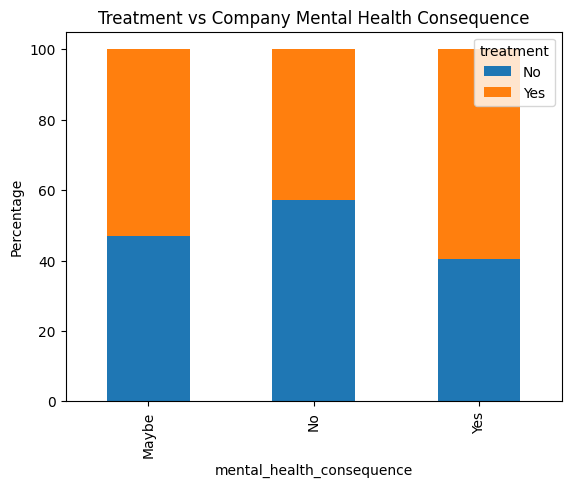

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Apakah dukungan perusahaan terhadap mental health berpengaruh pada keputusan seseorang untuk mencari pengobatan?
support_treatment = pd.crosstab(df['mental_health_consequence'], df['treatment'], normalize='index') * 100
print(support_treatment)

support_treatment.plot(kind='bar', stacked=True)
plt.title('Treatment vs Company Mental Health Consequence')
plt.ylabel('Percentage')
plt.show()

In [30]:
# Berapa persen responden secara umum yang pernah mencari pengobatan mental health?
df['treatment'].value_counts(normalize=True)

,proportion
treatment,
Yes,0.505957
No,0.494043


In [49]:
# Siapa yang paling banyak cari treatment? (berdasarkan gender, umur, dan remote)
df.groupby('Gender')['treatment'].value_counts(normalize=True)
df.groupby('remote_work')['treatment'].value_counts(normalize=True)
df.groupby('Age').mean(numeric_only=True)

,Gender,remote_work,benefits
Age,,,
-1726,NaN,NaN,NaN
-29,NaN,NaN,NaN
-1,NaN,NaN,NaN
5,NaN,NaN,NaN
8,NaN,NaN,NaN
11,NaN,NaN,NaN
18,NaN,NaN,NaN
19,NaN,NaN,NaN
20,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [50]:
# Apakah dukungan perusahaan berdampak?
df.groupby('mental_health_consequence')['treatment'].value_counts(normalize=True)

mental_health_consequence  treatment
Maybe                      Yes          0.530398
                           No           0.469602
No                         No           0.571429
                           Yes          0.428571
Yes                        Yes          0.595890
                           No           0.404110
Name: proportion, dtype: float64

In [41]:
# Seberapa banyak responden yang tahu perusahaan mereka menyediakan tunjangan untuk kesehatan mental?
df['benefits'].value_counts(normalize=True)

,proportion
benefits,


In [40]:
# Seberapa banyak responden yang merasa memiliki akses terhadap opsi perawatan kesehatan mental dari perusahaan?
df['care_options'].value_counts(normalize=True)

,proportion
care_options,
No,0.397935
Yes,0.352661
Not sure,0.249404


In [65]:
sample_data = df[['Gender', 'Age', 'treatment', 'remote_work', 'benefits', 'mental_health_consequence']].head(10).to_string()

prompt = [
    f"""Here is a sample of the dataset:\n{sample_data}\n
Please analyze the dataset and generate a unique, logical, and comprehensive 'Insight' section.
Focus on mental health trends, possible patterns, and observations from the data.
Write it as if it's part of a professional report."""
]

response = llm.generate(prompt)
print(response)


generations=[[Generation(text='**Insight**\n\nUpon examining the provided dataset, several intriguing patterns and potential trends concerning mental health consequences emerge, warranting further investigation. The data, while lacking specific treatment or remote work details, offers valuable insights into the mental health status of individuals across various age groups.\n\n1. **Age Distribution and Mental Health**: The dataset comprises individuals ranging from 23 to 44 years old. Notably, younger employees (below 35) appear to be more likely to report negative mental health consequences ("No" or "Maybe") compared to their older counterparts. Specifically, out of nine individuals under 35, seven report either "No" or "Maybe" regarding mental health consequences, whereas the four individuals aged 39, 42, and above all indicate "No" consequences. This preliminary observation suggests a potential correlation between age and mental health resilience, with younger employees experiencing 

In [66]:
print(response.generations[0][0].text)

**Insight**

Upon examining the provided dataset, several intriguing patterns and potential trends concerning mental health consequences emerge, warranting further investigation. The data, while lacking specific treatment or remote work details, offers valuable insights into the mental health status of individuals across various age groups.

1. **Age Distribution and Mental Health**: The dataset comprises individuals ranging from 23 to 44 years old. Notably, younger employees (below 35) appear to be more likely to report negative mental health consequences ("No" or "Maybe") compared to their older counterparts. Specifically, out of nine individuals under 35, seven report either "No" or "Maybe" regarding mental health consequences, whereas the four individuals aged 39, 42, and above all indicate "No" consequences. This preliminary observation suggests a potential correlation between age and mental health resilience, with younger employees experiencing more challenges in this regard.

2.

In [61]:
prompt = [
    "Based on the analysis I've done, including the influence of gender, age, remote work, company-provided benefits, and mental health consequences on treatment-seeking behavior, could you summarize the key insights into a conclusion and provide several actionable recommendations?"
]

response = llm.generate(prompt)
print(response)


generations=[[Generation(text='**Conclusion:**\n\nThe analysis reveals a multifaceted interplay of factors influencing treatment-seeking behavior for mental health issues. Key insights include:\n\n1. **Gender Differences:** Women are more likely to seek professional help than men, possibly due to societal norms and greater openness about emotional struggles.\n\n2. **Age Impact:** Younger adults (18-34) show higher treatment-seeking rates compared to older adults (55+), suggesting a generational gap in mental health awareness and stigma.\n\n3. **Remote Work Effects:** The shift to remote work has both positive and negative impacts. While it offers flexibility, it also contributes to feelings of isolation and increased stress, affecting treatment-seeking behavior.\n\n4. **Company-Provided Benefits:** Access to mental health benefits through employers significantly correlates with increased treatment-seeking, highlighting the importance of comprehensive employee wellness programs.\n\n5. *

In [62]:
print(response.generations[0][0].text)

**Conclusion:**

The analysis reveals a multifaceted interplay of factors influencing treatment-seeking behavior for mental health issues. Key insights include:

1. **Gender Differences:** Women are more likely to seek professional help than men, possibly due to societal norms and greater openness about emotional struggles.

2. **Age Impact:** Younger adults (18-34) show higher treatment-seeking rates compared to older adults (55+), suggesting a generational gap in mental health awareness and stigma.

3. **Remote Work Effects:** The shift to remote work has both positive and negative impacts. While it offers flexibility, it also contributes to feelings of isolation and increased stress, affecting treatment-seeking behavior.

4. **Company-Provided Benefits:** Access to mental health benefits through employers significantly correlates with increased treatment-seeking, highlighting the importance of comprehensive employee wellness programs.

5. **Mental Health Consequences:** The COVID-19